In [1]:
#기본개념!!
#미분: ??
#분산:(관측치-평균)^2/N-1
#표준편차:root(sigma(관측치-평균)^2)/n-1
#공분산:sigma(x-xbar)(y-ybar)/n-1
#상관계수:(sigma(x-xbar)(y-ybar)/n-1)/(xsigma * ysigma):-1 ~1
#벡터의 거리값:각 요소의 차의 제곱을 루트로 구함
#model 평가:MSE(mean square error):연속된 수치인 경우의 평가 :제곱 오차
#            RMSE(root)
#신경망에서 cost function 비용함수:(예측치-관측치)=>back propagation (역전파를 통해서 가중치를 수정)
#국어, 수학점수 같은 vector 상관계수가 높다.내적이 :1 =>상관계수 =내적 이 같은 말

In [2]:
#회귀분석,상관분석은 기본개념 !!
#회귀분석 다중공산성: 독립변수간의 영향력이 있으면 종속변수가 과하게 영향을 받을 수 있음
#회귀분석 자기상관성(autocorelation)이 존재: =>시계열 분석을 해야함
#그렇다면 시계열 분석에서 가장기초는 ARMA (autocorelation + moving average)
#         이동평균법을 하는 이유(주파수를 줄여줆=복잡하면 분석불가 예: 주식데이터를 arma로)
#         단점:자기 상관성이 있음 , 정상성을 띈 데이터에만 가능(평균일정 분산일정)
#         비정상성=>정상성으로 바꿔서 해야
#그래서 나온게 ARIMA(intergrated 통합=> 비정상성을 띈 데이터에도 가능)
#pandas 는 시계열 분석을 지원(시간 index 를 지원)


In [9]:
import numpy as np
from statistics import *
x=np.array([7,8,9])
y=np.array([9,10,20])
print(y.mean()) #통계:중위수(medians) :이상치의 영향을 받지 않음(평균은 영향 받음)
#공 분산 행렬
print("공분산",np.cov(x))
#상관계수 행렬(열 2,행2:4)
print("상관계수",np.corrcoef(x,y))

13.0
공분산 1.0
상관계수 [[1.         0.90419443]
 [0.90419443 1.        ]]


In [76]:
import numpy as np
arr=np.array([[1,2,3],[4,5,6],[7,8,9]])
print("원본",arr)
print("누적합(행)=",arr.cumsum(0)) 
print("누적곱(열)=",arr.cumprod(1))
print("배열의 합계=",arr.sum())
print("열방향로의 합계(행평균)=",arr.mean(axis=1)) #행방향과 열방향의 구분   0:열 ,1:행
print("행방향으로의 합계=",arr.sum(0)) #열별 합계

원본 [[1 2 3]
 [4 5 6]
 [7 8 9]]
누적합(행)= [[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]
누적곱(열)= [[  1   2   6]
 [  4  20 120]
 [  7  56 504]]
배열의 합계= 45
열방향로의 합계(행평균)= [2. 5. 8.]
행방향으로의 합계= [12 15 18]


In [17]:
#가중치(변수중요도를 부여)를 부여한다는 의미:
a=np.array([1,2,3,4])
wts=np.array([4,3,2,1])
print(np.average(a,weights=wts))
std=np.sqrt(np.mean(abs(a-a.mean())**2))
print(np.var([1,2,3,4]))#분산
print(np.std([1,2,3,4]))#표준편차


2.0
1.25
1.118033988749895


In [27]:
#matplotlib,seaborn,pandas.plot
-matplotlib 로 구성
-%matplotlib inline 를 사용해야 출력

SyntaxError: invalid syntax (<ipython-input-27-45286aeac217>, line 2)

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


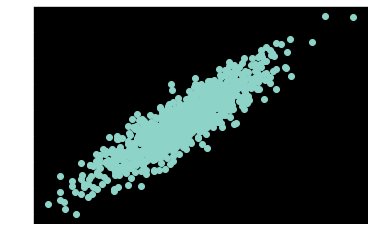

In [28]:
%matplotlib inline
from numpy import mean #from 을 사용하는 이유: 메모리 낭비를 절감
from numpy import std
from numpy.random import randn #서브패키지:linalg, random,fft(푸리에 변환),poly()
from numpy.random import seed  #random: 의사난수-데이터 출력순서 정해짐
from matplotlib import pyplot
seed(1) #랜덤인데 같은 수가 발생
data1=20 *randn(1000)+100 #randn 정규분포
data2=data1+(10*randn(1000)+50)
print("data1: mean=%.3f stdv=%.3f" % (mean(data1),std(data1)))
print("data2: mean=%.3f stdv=%.3f" % (mean(data2),std(data2)))
pyplot.scatter(data1,data2)
pyplot.show()

In [65]:
import matplotlib.pyplot as plt
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


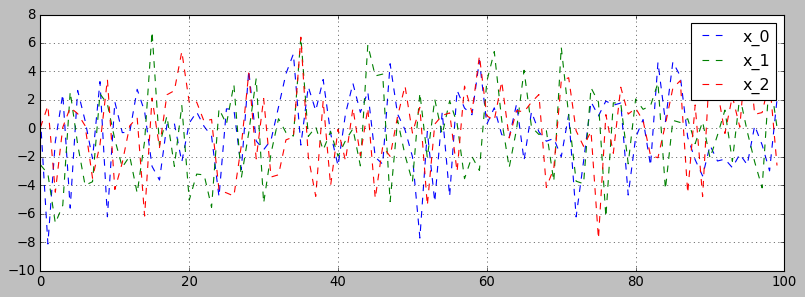

In [66]:
plt.style.use(['classic'])
xs=np.random.normal(0,3,(100,3)) #평균=0, 표준편차:3, 100x3 데이터 생성
plt.figure(figsize=(12,4)) #모양을 결정
for i in range(0,3):
    x=xs[:,i]
    plt.plot(range(0,len(x)),x,linewidth=1,linestyle='--',label='x_{}'.format(i))
plt.legend() #범례
plt.grid(True) 
plt.show()

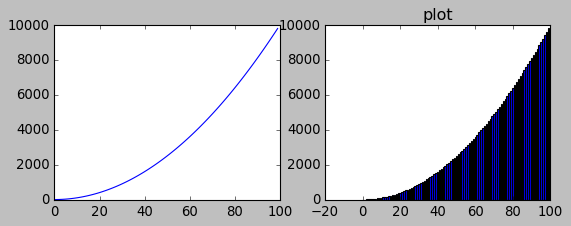

In [67]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1) #2행 1열 중 1번째
ax2=fig.add_subplot(2,2,2) #

x=range(0,100)
y=[v*v for v in x]

ax1.plot(x,y)
ax2.bar(x,y) #막대
plt.title("plot")
plt.show()

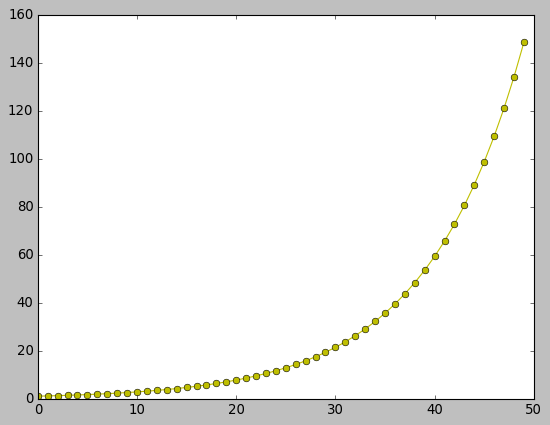

In [68]:
x1=np.linspace(0.0,5.0)
x2=np.linspace(0.0,2.0)

plt.plot(np.exp(x1),"yo-") #지수함수의 그래프 예-인구증가 
plt.show()

AxesSubplot(0.125,0.536364;0.775x0.363636)
AxesSubplot(0.125,0.1;0.775x0.363636)


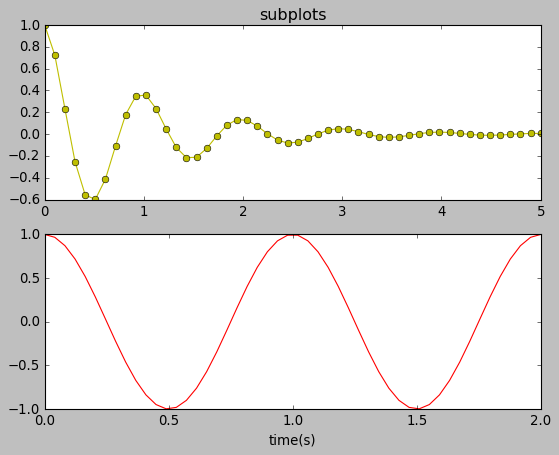

In [69]:
y1=np.cos(2*np.pi*x1)*np.exp(-x1) #줄어듦
y2=np.cos(2*np.pi*x2)
ax1=plt.subplot(2,1,1)
plt.plot(x1,y1,'yo-') #yellow, point marking linetype
plt.title('subplots')
print(ax1)
ax2=plt.subplot(2,1,2)
plt.plot(x2,y2,'r-')
plt.xlabel('time(s)')
print(ax2)
plt.show()

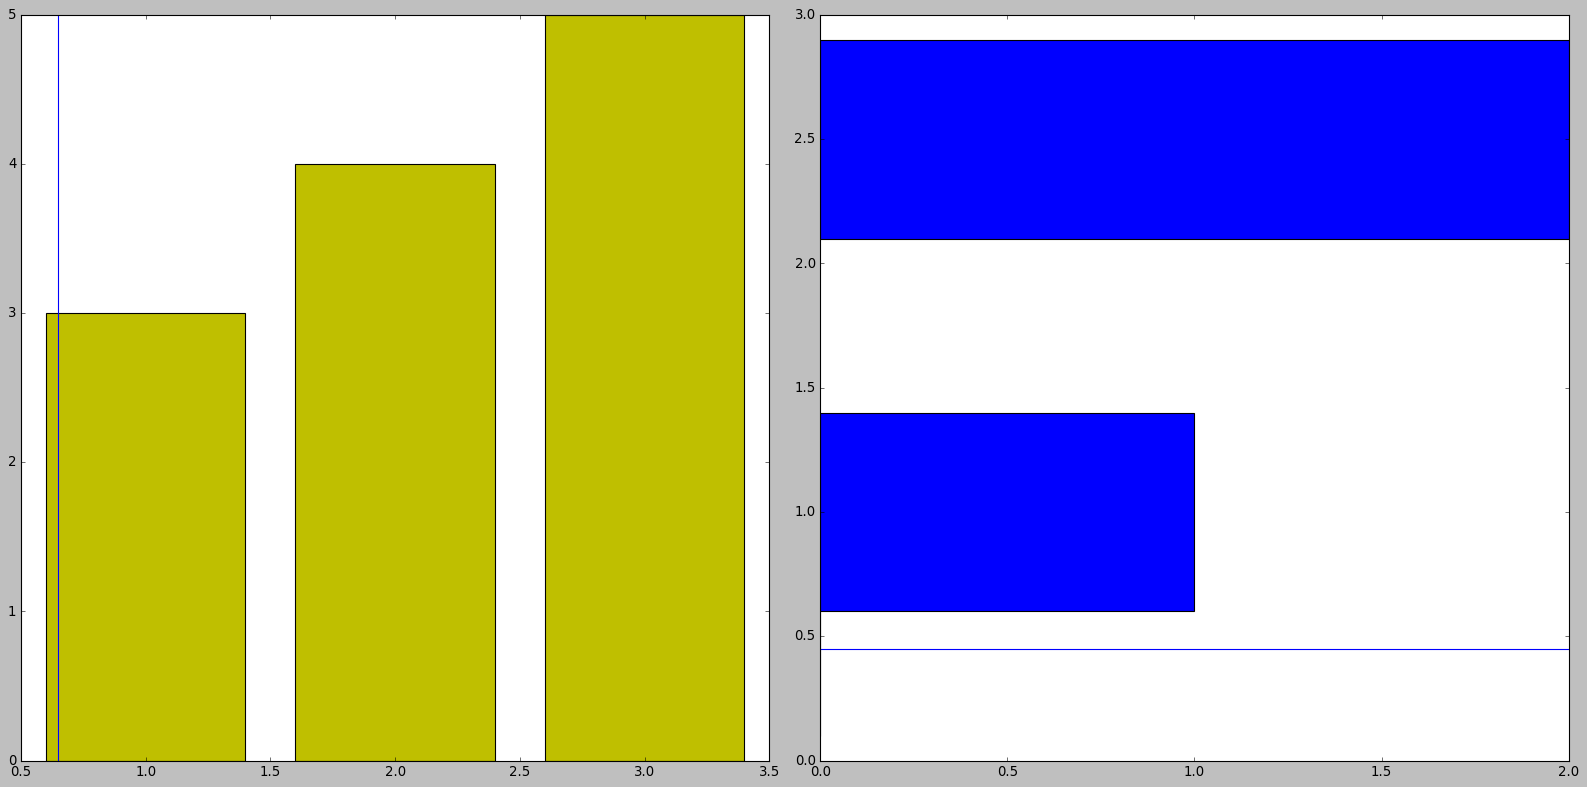

In [70]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
#이산형 막대그래스, 연속 그래프 histogam
ax1.bar([1,2,3],[3,4,5],color='y')
ax2.barh([0.5,1,2.5],[0,1,2]) #v:vertical, h:horizontal
ax1.axvline(0.65) 
ax2.axhline(0.45)
plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc74844f48>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc7487edc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc74844888>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc7487ef88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc74869ec8>],
 'means': []}

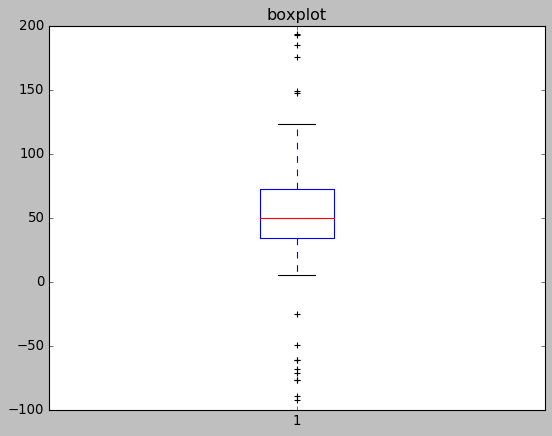

In [86]:
#boxplot
#IQR(inter quantile range )=3사분위수 -1사분위수
#IQR * +- 1.5 :상하한선
np.random.seed(19680801)
spread=np.random.rand(50)*100 #분포
center=np.ones(25)*50
flier_high=np.random.rand(10)*100+100 #상한선을 넘는 데이터
flier_low=np.random.rand(10)*-100
data=np.concatenate((spread,center,flier_high,flier_low)) #데이터를 병합
fig1,ax1=plt.subplots() #형태를 제어, ax1:도화지 
ax1.set_title("boxplot")
ax1.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc75178488>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc75178c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc7517adc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc75149e08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc75149f08>],
 'means': []}

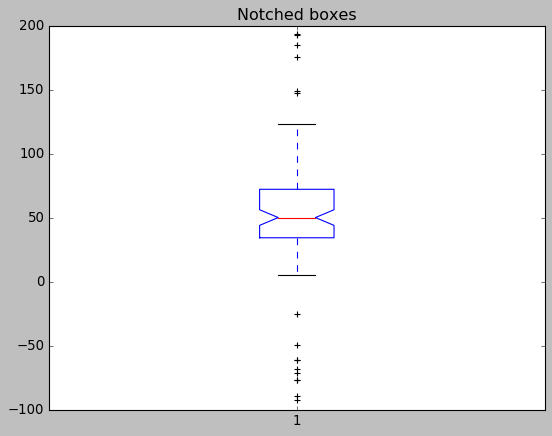

In [87]:
fig2,ax2=plt.subplots()
ax2.set_title('Notched boxes')
ax2.boxplot(data,notch=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc74a2dfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc74a06c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc74a2d7c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc74a38d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc74a34d48>],
 'means': []}

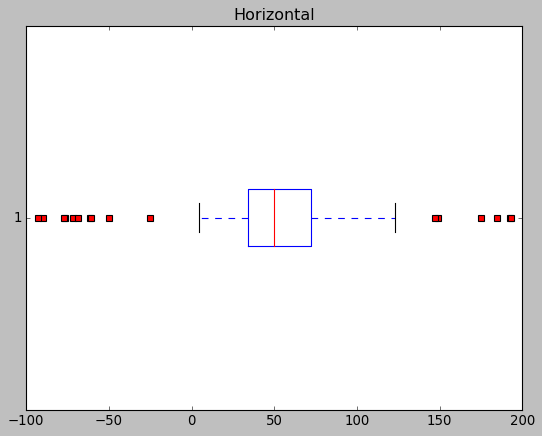

In [90]:
#vertical 수직의 horizantal 수평의 
red_square=dict(markerfacecolor='r',marker='s') #square
fig5,ax5=plt.subplots()
ax5.set_title('Horizontal')
ax5.boxplot(data,vert=False,flierprops=red_square)

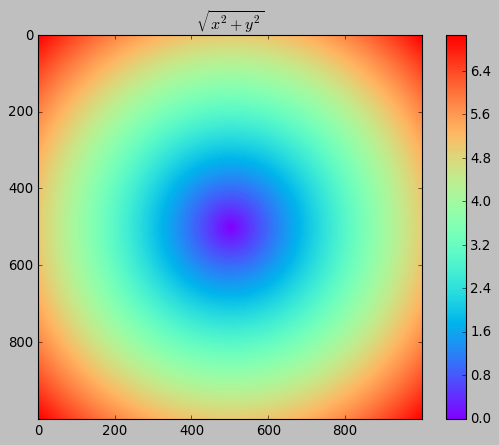

In [93]:
#meshgrid 그물망 격자
#그래프에 수식:latex 문법
points=np.arange(-5,5,0.01) #1000개
xs,ys=np.meshgrid(points,points) #좌우 1000x1000개
z=np.sqrt(xs**2+ys**2)
#팔레트:
plt.imshow(z,cmap=plt.cm.rainbow); #데이터를 imshow:숫자값을 픽셀로 출력하라 (숫자가 저장, 이미지(픽셀)는 사각형:RGB, 배경은 투명처리)
plt.colorbar()                  #컬러별 수의 크리값을 출력
plt.title("$\sqrt{x^2+y^2}$") #중심으로 부터의 거리값이므로 원
plt.show()

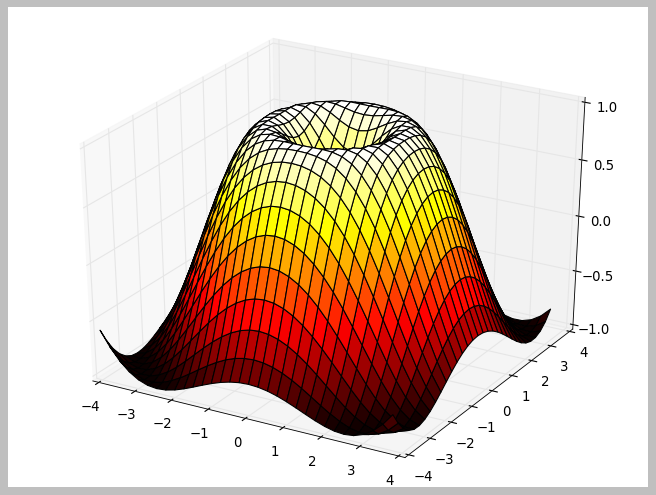

In [102]:
#3차원:Axes3D
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig) #3차원 출력 도화지
X=np.arange(-4,4,0.25) #중앙 0,0
Y=np.arange(-4,4,0.25)
X,Y=np.meshgrid(X,Y) #좌표점 -4, -3.75 , -3.5
R=np.sqrt(X**2+Y**2) #거리값
#Z=R
Z=np.sin(R)

#                      row,       column
ax.plot_surface(X,Y,Z, rstride=1, cstride=1,cmap='hot')
plt.show()
ax.plot_surface(X,Y,Z, rstride=1,cstride=1,cmap=plt.cm.rainbow)
plt.show()

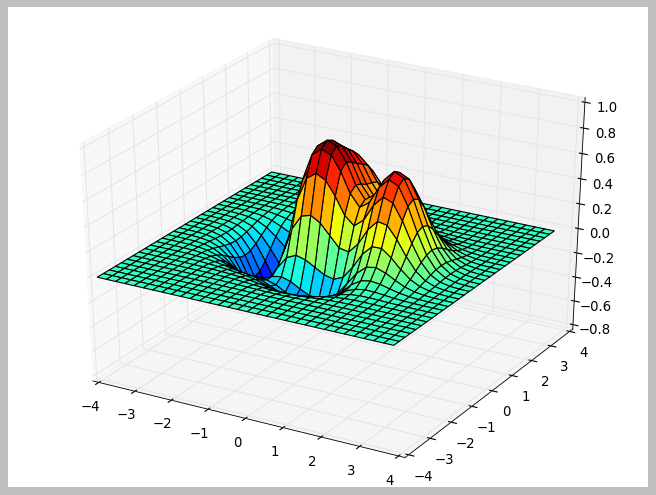

In [108]:
from mpl_toolkits.mplot3d import Axes3D
def f(x,y):return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
fig=plt.figure()
ax=Axes3D(fig)
X=np.arange(-4,4,0.25)
Y=np.arange(-4,4,0.25)
X,Y=np.meshgrid(X,Y)
Z=np.sin(f(X,Y))
#row, column
ax.plot_surface(X,Y,Z, rstride=1, cstride=1,cmap='jet')
plt.show()

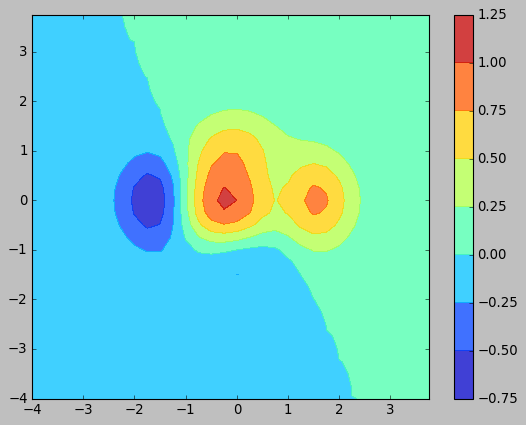

In [107]:
plt.contourf(X,Y,f(X,Y),8,alpha=.75,cmap='jet')
plt.colorbar()
plt.show()

[0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0]


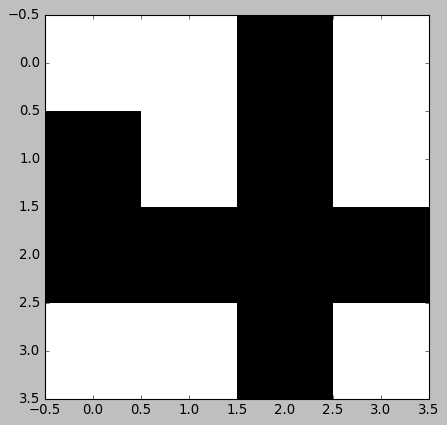

In [111]:
a=[0,0,1,0,
  1,0,1,0,
  1,1,1,1,
  0,0,1,0]
np1=np.array(a)
print(np1)
plt.imshow(np1.reshape(4,4),cmap="Greys",interpolation="nearest") #보간법: 컬러값이 지정이 되지 않으면
#보간해서 적용하라
plt.show()

In [121]:
%matplotlib inline
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt
plt.style.use(['classic'])
font_path="C:/Windows/Fonts/NanumBarunGothic.TTF" #윈도 모든 폰트가 있는곳
font_name=font_manager.FontProperties(fname=font_path).get_name() #폰트 이름 획득
#resource configuration 폰트 이름
matplotlib.rc('font',family=font_name)
plt.plot([1,2,3,4])
plt.xlabel('시간')
plt.ylabel('거리')
plt.show

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Windows/Fonts/NanumBarunGothic.TTF'

In [115]:
import matplotlib.font_manager as fm
path='C:\\\indows\\Fonts\\NanumBarunGothic.ttf'
fontprop=fm.FontPropertise(fname=path,size=18)
data=np.random.randint(-100,100,50).cumsum() #cumulative sum 누적합계 -100~100 까지 중 50개
data
plt.plot(range(50),data,'r')
plt.title('가격변동 추이',fontproperties=fontprop)
plt.ylabel('가격',fontproperties=fontprop)
plt.show()

AttributeError: module 'matplotlib.font_manager' has no attribute 'FontPropertise'

Text(0, 0.5, 'f(x)')

findfont: Font family ['바탕'] not found. Falling back to DejaVu Sans.
findfont: Font family ['바탕'] not found. Falling back to DejaVu Sans.


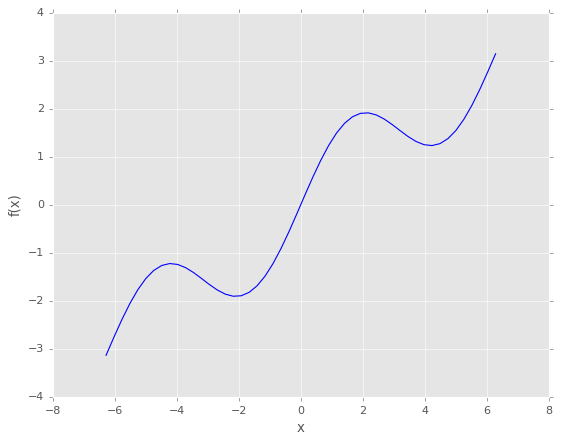

In [117]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family']='바탕'
def f(x):
    return np.sin(x) +0.5*x  #주기함수
x=np.linspace(-2 *np.pi, 2*np.pi,50)
plt.plot(x,f(x),'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [ ]:
#최소제곱법을 이용해서 fitting 적합

Text(0, 0.5, 'f(x)')

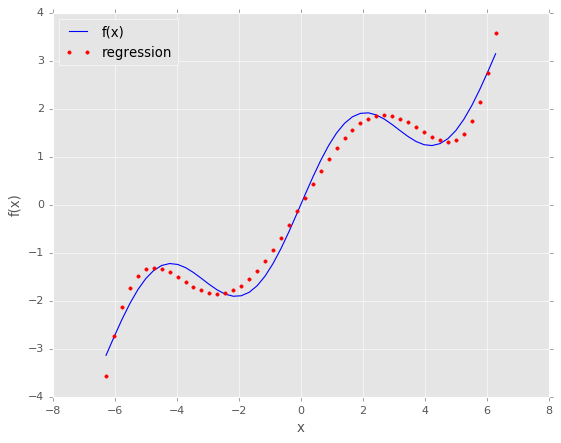

In [119]:
#polyfit 다차방정식으로 fitting(적합);계수를 찾아내는 것
reg=np.polyfit(x,f(x),deg=5) #5차 방정식으로 피팅하라 (꼭지점은 4개)
ry=np.polyval(reg,x) #5차 방정식으로 회귀

plt.plot(x,f(x),'b',label='f(x)') #원본 데이터
plt.plot(x,ry,'r.',label='regression') #최소제곱법으로 피팅된 데이터
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')

In [126]:
#지리정보 시스템
import folium
#위경도 좌표
map_1=folium.Map(location=[37.565711,126.978090],zoom_start=16)
                 #,tiles="Stamen Terrain")
folium.Marker([37.565711,126.978090],popup='서울시청').add_to(map_1) #확대축소
folium.Marker([37.565711,126.978090],popup='서울시청밑',icon=folium.Icon(icon='cloud')).add_to(map_1)
map_1

In [208]:
#숙제 서울소재 대학교
map_1=folium.Map(location=[37.565711,126.978090],zoom_start=16)
                 #,tiles="Stamen Terrain")
folium.Marker([37.460155, 126.951841],popup='서울대학교').add_to(map_1) #확대축소
folium.Marker([37.565997, 126.938540],popup='연세대학교').add_to(map_1)
folium.Marker([37.496490, 126.957481],popup='숭실대학교').add_to(map_1)
folium.Marker([37.612235, 126.997650],popup='국민대학교').add_to(map_1)
folium.Marker([37.560003, 126.945469],popup='이화여대학교').add_to(map_1)
folium.Marker([37.596425, 127.052544],popup='경희대학교').add_to(map_1)
folium.Marker([37.584044, 127.058713],popup='서울시립대학교').add_to(map_1)
folium.Marker([37.551786, 126.924900],popup='홍익대학교').add_to(map_1)
folium.Marker([37.590986, 127.027702],popup='고려대학교').add_to(map_1)
folium.Marker([37.602850, 126.955220],popup='상명대학교').add_to(map_1)

map_1

In [ ]:
#pandas: Series,DataFrame,Panel
#numpy 방식의 인덱싱이 가능, +dict (중복을 허용, 순서를 보장)

In [128]:
import pandas as pd
data={'a':0.,'b':1., 'c':2.} #dict 로 초기화
s=pd.Series(data) #1차원, 키가 인덱스로 변함 #s 는 열이름
print(s['a']) #키 인덱싱이 가능 
s=pd.Series(data,index=['b','c','d','a']) #index 이하는 행이름 판다스에서"키값=행이름=인덱스"
print(s['a'])
print(s['d']) #데이터가 없을때 nan
list(s)

0.0
0.0
nan


[1.0, 2.0, nan, 0.0]

In [133]:
s=pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
print('인덱스에 의한 출력',s[0])
print(s['a']) #키에 의한 인덱스 
print(s[:3]) #numpy
print()
print('음수',s[-3:])
s['a']=100
print()
print(s['a'])
s['f']=10
print(s['f'])
print()
print('filtering에 의한 출력',s[s>4])
print(s)
print(s*2)

인덱스에 의한 출력 1
1
a    1
b    2
c    3
dtype: int64

음수 c    3
d    4
e    5
dtype: int64

100
10

filetring에 의한 출력 a    100
e      5
f     10
dtype: int64
a    100
b      2
c      3
d      4
e      5
f     10
dtype: int64
a    200
b      4
c      6
d      8
e     10
f     20
dtype: int64


In [168]:
data=np.array('a','b','c','d') #ndarray
#range=>list
#arange=>ndarray
#
s=pd.Series(data) #ndarray를 이용해 시리즈 초기화
print("시리즈데이터",s.values)
print("시리즈인덱스",s.index) #R
print("시리즈초기화",s)
print("시리즈인덱스의 값",s.index.values)
print(s[0])
print(s.head())
print(s.value_counts()) #도수 분포표
print(s.value_counts(normalize=True)) #사이즈 1로 =>상대도수분포표
print(s.describe()) #숫자변수에 대해서만 ,문자열인 경우 오브젝트(object)로 나옴
print("데이터타입은:",s.dtypes)
print("차원",s.ndim)
print("차수",s.shape)

ValueError: only 2 non-keyword arguments accepted

In [165]:
#dict
sdata={'ohio':35000,'texas':71000,'oregon':16000,'utah':5000}
obj3=pd.Series(sdata)
print(obj3)
print(obj3.shape)
states=['california','ohio','oregon','texas']
obj4=pd.Series(sdata,index=states) #california :nan
print(obj4)
print('시리즈인덱스',obj3.index) #index
print('시리즈인덱스',obj4.index) #index
print('\nobj4 Null이 있는가?\n',pd.isnull(obj4),"\n") #데이터가 널인가.
print('obj4 결측치가 있는가?\n',pd.notnull(obj4),"\n") #값이 있을 때
print('객체출력')

ohio      35000
texas     71000
oregon    16000
utah       5000
dtype: int64
(4,)
california        NaN
ohio          35000.0
oregon        16000.0
texas         71000.0
dtype: float64
시리즈인덱스 Index(['ohio', 'texas', 'oregon', 'utah'], dtype='object')
시리즈인덱스 Index(['california', 'ohio', 'oregon', 'texas'], dtype='object')

obj4 Null이 있는가?
 california     True
ohio          False
oregon        False
texas         False
dtype: bool 

obj4 결측치가 있는가?
 california    False
ohio           True
oregon         True
texas          True
dtype: bool 

객체출력
obj3를 출력합니다.
 ohio      35000
texas     71000
oregon    16000
utah       5000
dtype: int64

obj4를 출력합니다.
 california        NaN
ohio          35000.0
oregon        16000.0
texas         71000.0
dtype: float64


In [167]:
print('obj3를 출력합니다.',obj3)
print('obj4를 출력합니다.',obj4)

obj3를 출력합니다. ohio      35000
texas     71000
oregon    16000
utah       5000
dtype: int64
obj4를 출력합니다. california        NaN
ohio          35000.0
oregon        16000.0
texas         71000.0
dtype: float64


In [166]:
print("연산결과를 출력합니다.",obj3+obj4) #짝이 없으면 nan #짝이 맞지 않기 때문에:

연산결과를 출력합니다. california         NaN
ohio           70000.0
oregon         32000.0
texas         142000.0
utah               NaN
dtype: float64


In [138]:
s=pd.Series(['A','B','Aaba','Baca',np.nan,'CABA','cat'])
s.str.count('a')

0    0.0
1    0.0
2    2.0
3    2.0
4    NaN
5    0.0
6    1.0
dtype: float64

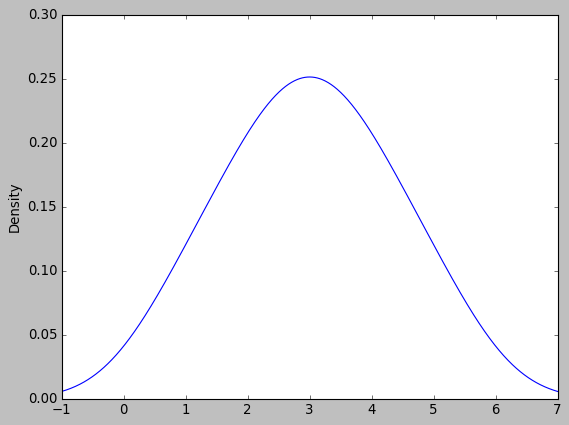

In [139]:
s=pd.Series([1,2,2.5,3,3.5,4,5])
s.plot.kde() #kernel density estimate 곡선으로 출력
#값이 6개 밖에 없는데 부드러운 곡선이 나올수 없음: 데이터가 없는 부분은 kernel 로 예측 ,가우시안 분포
plt.show()

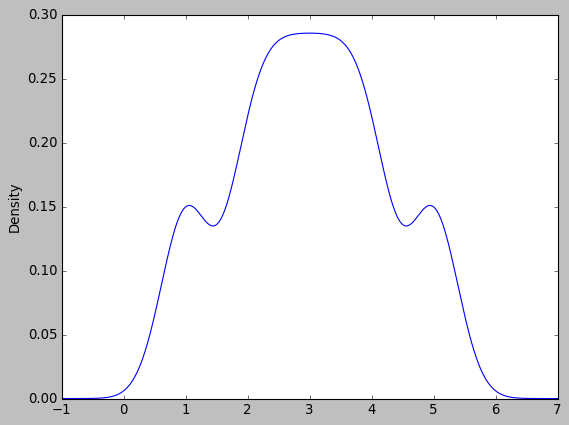

In [143]:
s.plot.kde(bw_method=0.3) #과적합 bin width
plt.show()

In [144]:
import pandas as pd
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data 

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [145]:
data['area']
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [146]:
#객체비교 is None
data.area is data['area']

True

In [147]:
#객체에서 변수를 실시간으로 추가하는 것이 가능
#list 에서는 append
data['density']=data['pop']/data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [148]:
data.values #ndarray =>numpy 함수로 처리

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [149]:
data.T #행 열 전치 

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [150]:
data.values[0] #행값 가져옴

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [151]:
data.iloc[:3,:2] #행과 열로 입력 inte

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [152]:
data.loc[:'Illinois',:'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [153]:
data.iloc[0,2]=90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [154]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [156]:
import pandas as pd
import numpy as np

d = {'Name':pd.Series(['김하나','이하나','삼하나','사하나','오하나','육하나','칠하나', '팔하나']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

In [159]:
df=pd.DataFrame(d)
print(df)
print('축',df.axes)
print('데이터타입',df.dtypes)
print('데이터타입',df.get_dtype_counts) #unique (중복이 없어서 다나옴)
print('비었나',df.empty) #데이터가 비었나
print('차원',df.ndim)
print('차수',df.shape)
print('사이즈',df.size)
print('값',df.values)
print(df.head(2))
print(df.tail(2))

  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN
축 [RangeIndex(start=0, stop=8, step=1), Index(['Name', 'Age', 'Rating'], dtype='object')]
데이터타입 Name       object
Age       float64
Rating    float64
dtype: object
데이터타입 <bound method NDFrame.get_dtype_counts of   Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN>
비었나 False
차원 2
차수 (8, 3)
사이즈 24
값 [['김하나' 25.0 4.23]
 ['이하나' 26.0 3.24]
 ['삼하나' 25.0 3.98]
 ['사하나' 23.0 2.56]
 ['오하나' 30.0 3.2]
 ['육하나' 29.0 4.6]
 ['칠하나' 23.0 3.8]
 ['팔하나' nan nan]]
  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
  Name   Age  Rating
6  칠하나  23.0     3.8
7  팔하나   NaN     NaN


In [162]:
print('합계',df.sum()) #전체 데이터 합 (이름도)
print()
print(df.mean())  #숫자만 적용
print()
print(df.std())#standard deviation 표준편차
print(df.describe()) #숫자데이터만 적용
print('오브젝트',df.describe(include=['object'])) #문자
print(df.describe(include='all')) #unique, top,freq 

합계 Name      김하나이하나삼하나사하나오하나육하나칠하나팔하나
Age                            181
Rating                       25.61
dtype: object

Age       25.857143
Rating     3.658571
dtype: float64

Age       2.734262
Rating    0.698628
dtype: float64
             Age    Rating
count   7.000000  7.000000
mean   25.857143  3.658571
std     2.734262  0.698628
min    23.000000  2.560000
25%    24.000000  3.220000
50%    25.000000  3.800000
75%    27.500000  4.105000
max    30.000000  4.600000
오브젝트        Name
count     8
unique    8
top     오하나
freq      1
       Name        Age    Rating
count     8   7.000000  7.000000
unique    8        NaN       NaN
top     오하나        NaN       NaN
freq      1        NaN       NaN
mean    NaN  25.857143  3.658571
std     NaN   2.734262  0.698628
min     NaN  23.000000  2.560000
25%     NaN  24.000000  3.220000
50%     NaN  25.000000  3.800000
75%     NaN  27.500000  4.105000
max     NaN  30.000000  4.600000


In [174]:
data={'state': ['경기', '강원', '서울', '충북', '인천'],
      'year':[2000,2001,2002,2001,2002],
      'pop':[1.5,1.7,3.6,2.4,2.9]}

frame2=pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                 index=['one', 'two', 'three', 'four', 'five']) 
data2=pd.Series(data)

,year,state,pop,debt
one,2000,경기,1.5,NaN
two,2001,강원,1.7,NaN
three,2002,서울,3.6,NaN
four,2001,충북,2.4,NaN
five,2002,인천,2.9,NaN


In [180]:
#state 만 출력하시오
print(frame2['state'])
#debt 열을 추가하고 모든값을 16.5로 입력하시오
frame2['debt']=16.5
print("값적용후".frame2)
#debt를 pd.Series([-1.2,-1.5,-1.7],index=['two','four','five'])로 수정하시오
val=pd.Series([-1.2,-1.5,-1.7],index=['two','four','five'])
print("시리즈데이터 삽입후",frame2)
#파생변수 'estern'에 주소가 서울인가를 따져 서울은 True 아니면 False 가 입력되게 하시오
frame2['estern']=frame2.state='서울'
print(frame2['estern'])
def frame2['estern']
print(frame2['year']['one']) #열이 먼저옴
print(frame2.loc['one','year'])

SyntaxError: invalid syntax (<ipython-input-180-c2fd57ebfb44>, line 12)

In [ ]:
#시간함수
#리눅스:timestamp 1970 1. 1 이후로 경괴된 mili초로 표현
#내부적으로 데이터 저장시 timestamp로 
#pandas 에서는 nano 초가지 표현
#시간인덱스 :시계열 분석:DateTimeIndex, PeriodIndex 주기값
#파이썬:time.time():2000.1.1부터 경과된 mili 초로 표현
#datetime(날짜와 시간을 표현)

In [182]:
import time
print(time.time()) #밀리초로 표현 (.밑이 밀리초)
print()
print(time.localtime()) #년월일 시분초
yesterday=time.localtime(time.time()-60*60*24) #하루전으로 시간연산 가능
yesterday
print()
print(yesterday)
time.strftime('%Y %m %d') #시간을 문자열로 변경해서 출력

1578383681.789067

time.struct_time(tm_year=2020, tm_mon=1, tm_mday=7, tm_hour=16, tm_min=54, tm_sec=41, tm_wday=1, tm_yday=7, tm_isdst=0)

time.struct_time(tm_year=2020, tm_mon=1, tm_mday=6, tm_hour=16, tm_min=54, tm_sec=41, tm_wday=0, tm_yday=6, tm_isdst=0)


'2020 01 07'

In [183]:
from datetime import date,time,datetime,timedelta #시간차
now=datetime.now() #년월일 시분초
print(now)
now.year,now.month,now.day
now.timestamp() #시간을 밀리초로 표현하고 싶을때 

2020-01-07 16:56:28.286432


1578383788.286432

In [195]:
now_str=now.strftime('%Y-%m-%d %H:%M:%S') #년월일시분초=>문자열
print(now_str)

2020-01-07 16:56:28


In [196]:
datetime.strptime(now_str,'%Y-%m-%d %H:%M:%S') #2019-11-01 11:49:49


datetime.datetime(2020, 1, 7, 16, 56, 28)

In [198]:
delta=datetime(2015,1,7) - datetime(2010,6,24,8,15)
print('시간차는=',delta, dalta.days,delta.seconds)

NameError: name 'dalta' is not defined

In [199]:
#날짜계산
start=datetime(2019,1,7)
print(start+timedelta(12)) #start날짜의 12일 이후 (기본이 일수)
start+timedelta(hours=-5) #start 날짜의 5시간 전

2019-01-19 00:00:00


datetime.datetime(2019, 1, 6, 19, 0)

In [201]:
import pandas as pd
print(pd.datetime.now())
print(pd.Timestamp('2017-03-01'))
print(pd.Timestamp(1587687255,unit="s"))

2020-01-07 17:09:19.571195
2017-03-01 00:00:00
2020-04-24 00:14:15


In [203]:
#datetimeindex 생성:행-index , 열키:columns
#30분단위로
print(pd.date_range("11:00","13:30",freq='30min'))
print('시간으로 ',pd.date_range("11:00","13:30",freq="30min".time))
print(pd.date_range("11:00","13:30",freq='H'))#hour

DatetimeIndex(['2020-01-07 11:00:00', '2020-01-07 11:30:00',
               '2020-01-07 12:00:00', '2020-01-07 12:30:00',
               '2020-01-07 13:00:00', '2020-01-07 13:30:00'],
              dtype='datetime64[ns]', freq='30T')


AttributeError: 'str' object has no attribute 'time'

In [204]:
#지정된 시간을 datetimeindex로 생성 
print(pd.to_datetime(pd.Series (['jul 31','2009','2010-01-10',None])))
print(pd.to_datatime(["2005/11/23","2010.12.31",None]))

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-07-31 00:00:00

In [205]:
print(pd.date_range('1/1/2017',periods=5)) #일간격: 기본주기

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05'],
              dtype='datetime64[ns]', freq='D')


In [206]:
print(pd.date_range('1/1/2017',periods=5,freq='M')) #월 간격 =>5개월 간격

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31'],
              dtype='datetime64[ns]', freq='M')


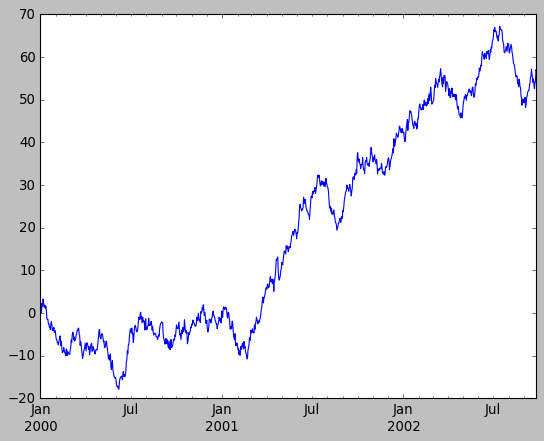

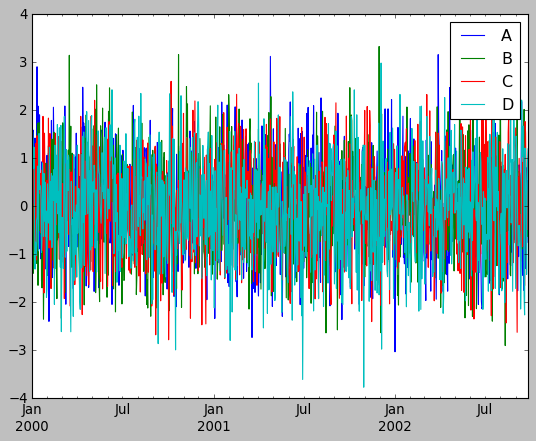

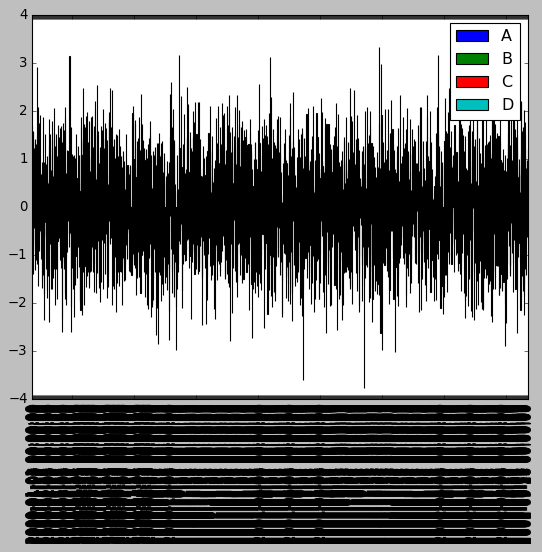

In [202]:
ts=pd.Series(np.random.randn(1000),
            index=pd.date_range('1/1/2000',periods=1000))
ts=ts.cumsum()
ts.plot()
#1000x4 , ABCD 인 데이터
df=pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=list('ABCD'))
df.plot()
df.plot.bar()

In [ ]:
# 문제 다음 데이터를 데이터프레임에 저장하시요
#       지역  2018     2017   2016    2015     2015-2018 증가율
서울 수도권  9904312 9631482 9762546 9853972    0.0283
부산 경상권  3448737 3393191 3512547 3655437    0.0163
인천 수도권  2890451 2632035 2517680 2466338    0.0982
대구 경상권  2466052 2431774 2456016 2473990    0.0141 



In [3]:
import pandas as pd
data={"2018": [9904312, 3448737, 2890451, 2466052],
    "2017": [9631482, 3393191, 2632035, 2431774],
    "2016": [9762546, 3512547, 2517680, 2456016],
    "2015": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2015-2018 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2018", "2017", "2016", "2015", "2015-2018 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
df

,지역,2018,2017,2016,2015,2015-2018 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [7]:
#문제: 2015-2018증가율을 %로 변경하시오
df["2015-2018 증가율"]=round((df["2018"]-df["2015"])/df["2015"]*100,2)
#문제:2015-2017의 증가율을 구해서 변수를 추가하시오
#(열이름:'2015-2017 증가율")
df["2015-2017 증가율"]=round((df["2017"]-df["2015"])/df["2015"]*100,2)

df

,지역,2018,2017,2016,2015,2015-2018 증가율,2015-2017 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.51,-2.26
부산,경상권,3448737,3393191,3512547,3655437,-5.65,-7.17
인천,수도권,2890451,2632035,2517680,2466338,17.20,6.72
대구,경상권,2466052,2431774,2456016,2473990,-0.32,-1.71
